# CSII 2024 Exercise 11: Nonlinear Control Part 1
&copy; 2024 ETH Zurich, Felix Schnitzler, Jungcheng Fu, Dejan Milojevic, Paolo Petri, Joël Gmür; Institute for Dynamic Systems and Control; Prof. Emilio Frazzoli

## Description
This week's Jupyter notebook will cover feedback linearization and differential flatness.

- Paolo Petri; ppetri@ethz.ch
- Juncheng Fu; juncfu@ethz.ch
- 
- 

As usual, we start by installing the `control` module and import the required libraries.

In [1]:
# Install the required python library with pip 
%pip install control

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.0.1 -> 24.0
[notice] To update, run: C:\Users\elias\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


In [2]:
import numpy as np
import control as ct
import control.flatsys as fs
import matplotlib.pyplot as plt

## Problem 2: Lyapunov Stability

Consider again the nonlinear system described by the differential equation:

$$ \dot{v} = -\gamma v^2 + u $$

where $ \gamma $ is a positive constant and $ u $ is the control input.

As you recall from the previous exercise we have our equilibrium at $ u_{eq} = 20 \frac{m}{s^2} $ and $ v_{eq} = 127.685 \frac{m}{s} $.

In [3]:
u_eq = 20
v_eq = 127.685

### Lyapunov Function

Define a Lyapunov function $ V(v) $ for the system. A common choice for a Lyapunov function for such systems is a quadratic function. Assume:

$$ V(v) = \frac{1}{2}(v - v_{eq})^2. $$

Compute the time derivative of the Lyapunov function.

In [4]:
# Define the Lyapunov function
def V(v, v_eq):
    return 0.5 * (v - v_eq)**2

In [7]:
# Compute the time derivative of the Lyapunov function
def V_dot(v, gamma, u, y_eq):
    return (v - y_eq) * (-gamma * v**2 + u)

### Stability Analysis

Below you find code that creates values for this analysis and plots them for visual understanding.

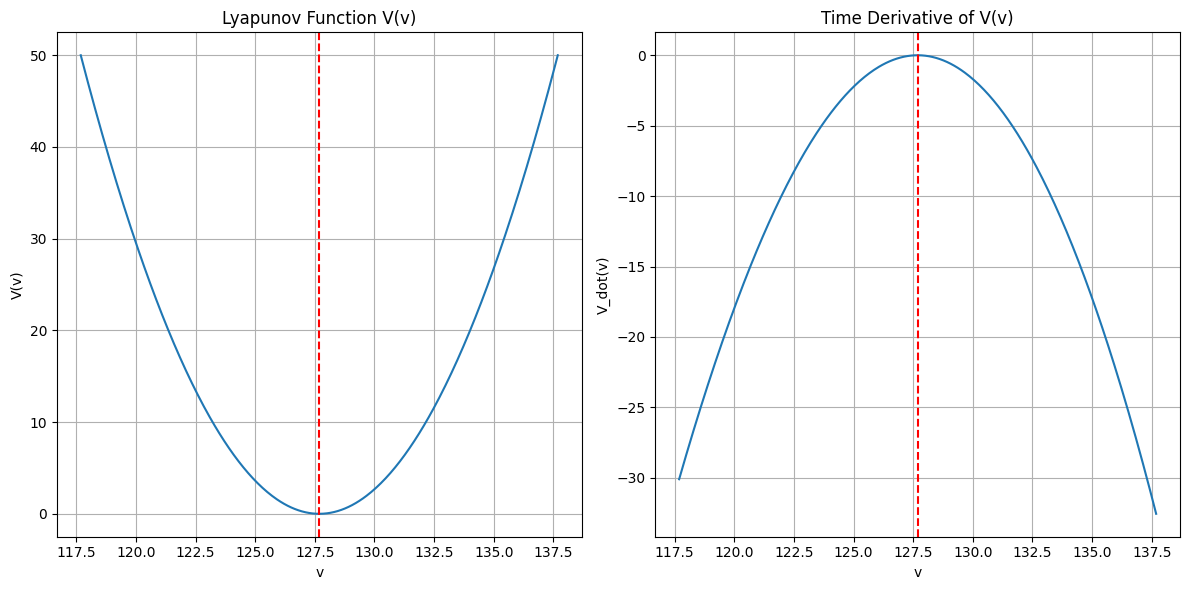

In [10]:
# Values for v to analyze

gamma = 1.293 * 1.1 * 1.38 * 1 / (2 * 800)

v_values = np.linspace(v_eq - 10, v_eq + 10, 400)
V_values = V(v_values, v_eq)
V_dot_values = V_dot(v_values, gamma, u_eq, v_eq)

# Plot the Lyapunov function and its derivative
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.plot(v_values, V_values)
plt.axvline(x=v_eq, color='r', linestyle='--')
plt.title('Lyapunov Function V(v)')
plt.xlabel('v')
plt.ylabel('V(v)')
plt.grid(True)

plt.subplot(1, 2, 2)
plt.plot(v_values, V_dot_values)
plt.axvline(x=v_eq, color='r', linestyle='--')
plt.title('Time Derivative of V(v)')
plt.xlabel('v')
plt.ylabel('V_dot(v)')
plt.grid(True)

plt.tight_layout()
plt.show()


Show that $ \dot{V}(v) $ is non-positive definite, for that create an if-else statment. What does this imply about the stability of the equilibrium point $ y_{eq} $? 

In [11]:
# Stability analysis
if np.all(V_dot_values <= 0):
    print("The equilibrium point is stable in the sense of Lyapunov.")
else:
    print("The equilibrium point is not stable in the sense of Lyapunov.")

The equilibrium point is stable in the sense of Lyapunov.


#### Conclusion

If $ \dot{V}(v) \leq 0 $ for all $ v $, it implies that $ V(v) $ is non-increasing along the system's trajectories. This means any small deviation from $ v_{eq} $ will not cause the system to diverge away from $ v_{eq} $. Thus, the equilibrium point $ v_{eq} $ is stable in the sense of Lyapunov.

### Global stability

Remember the conditions from your lecture for global stability:

* $ V(x) \geq 0 $, for all $ x \in D $.
* $ V(x) = 0 \iff x = x_0 $, i.e., $ V(x) = 0 $ if and only if $ x = x_0 $.
* $ \lim_{|x| \to +\infty} V(x) = +\infty $.
* $ \frac{d}{dt} V(x(t)) = \frac{\partial V(x)}{\partial x} \cdot \frac{dx(t)}{dt} = \frac{\partial V(x)}{\partial x} \cdot f(x) \leq 0 $, for all $ x(t) \in \mathbb{R}^n $.

Consider these conditions and discuss whether the chosen Lyapunov function $ V(v) = \frac{1}{2}(v - v_{eq})^2 $ satisfies them for global stability of the system.

#### Conclusion

By looking at the plots and the Lyapunov function itself one can see that our system satisfies global stability for our chosen equilibrium point.